In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
def var_encoding(df):
    df["Sex"] = df["Sex"].map({"F": 0, "M": 1})
    df["ChestPainType"] = df["ChestPainType"].map({"TA": 1, "ATA": 2, "NAP": 3, "ASY": 4})
    df["RestingECG"] = df["RestingECG"].map({"Normal": 1, "ST": 2, "LVH": 3})
    df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})
    df["ST_Slope"] = df["ST_Slope"].map({"Up": 1, "Flat": 2, "Down": 3})

    return df

data = var_encoding(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,1,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,4,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,1,0


In [5]:
X = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       112
           1       0.93      0.88      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



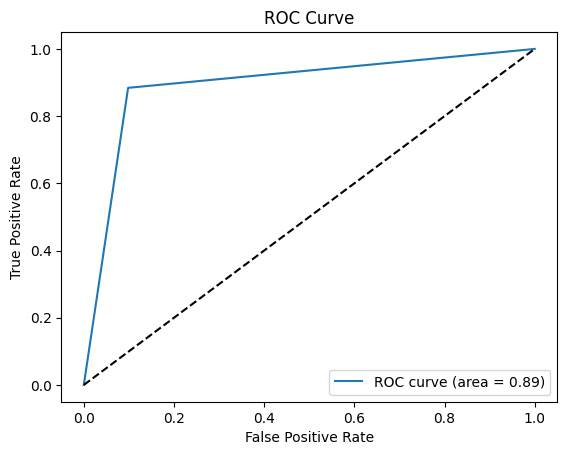

ROC-AUC Score: 0.89


In [7]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC-AUC Score: {roc_auc:.2f}')

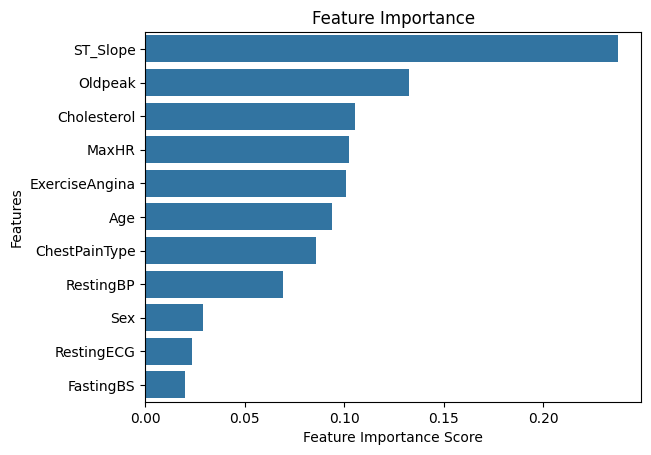

In [8]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting Feature Importance
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()